In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Cargamos la imagen del mandril
img = cv2.imread('mandril.jpg') 
#Convertimos la imagen a gris
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)


TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.95*maxfil.

Valor máximo de píxeles blancos en una fila (maxfil): 220
Número de filas con píxeles >= 95% de maxfil: 2
Posiciones de las filas: [ 12 100]
Los valores de las filas son: [220. 212.]


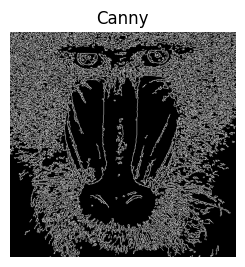

In [3]:

#Cuenta el número de píxeles blancos (255) por fila
#Suma los valores de los pixeles por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#El resultado será el número de píxeles blancos por fila
row = row_counts / (255)


#Obtener el valor máximo de píxeles blancos en una fila
maxfil = np.max(row)

#Determinar las filas con píxeles blancos >= 0.95 * maxfil
threshold = 0.95 * maxfil
rows_up = np.where(row >= threshold)[0]



print(f"Valor máximo de píxeles blancos en una fila (maxfil): {int(maxfil)}")
print(f"Número de filas con píxeles >= 95% de maxfil: {len(rows_up)}")
print(f"Posiciones de las filas: {rows_up}")
#Usamos la funcion flatten() para "aplanar" row[rows_up] ya que es un array de arrays
print(f"Los valores de las filas son: {np.array(row[rows_up]).flatten()}")


#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

Valor máximo de píxeles blancos en una fila (maxfil): 216
Número de filas con píxeles >= 95% de maxfil: 7
Posiciones de las filas: [  3   4   8  24  82  83 100]
Los valores de las filas son: [210. 213. 214. 210. 209. 216. 208.]
###
Valor máximo de píxeles blancos en una columna (maxCol): 219
Número de colimnas con píxeles >= 95% de maxCol: 3
Posiciones de las columnas: [104 127 288]
Los valores de las columnas son: [212. 219. 213.]


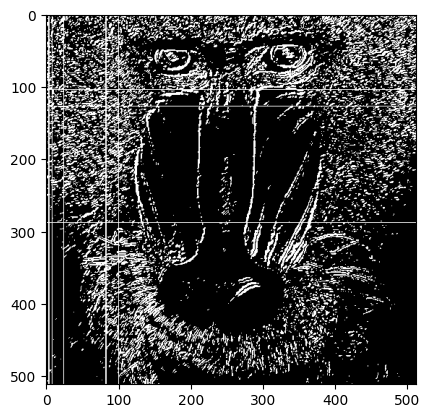

In [4]:
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

# Conversión a byte con openCV
sobel8_v1 = cv2.convertScaleAbs(sobel)

#Define valor umbral
valorUmbral = 100 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(sobel8_v1, valorUmbral, 255, cv2.THRESH_BINARY)


#Suma los valores de los pixeles por fila
row_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#El resultado será el número de píxeles blancos por fila
row = row_counts / (255)  

#Obtener el valor máximo de píxeles blancos en una fila
maxfil = np.max(row)

#Determinar las filas con píxeles blancos >= 0.95 * maxfil
threshold = 0.95 * maxfil
rows_up = np.where(row >= threshold)[0]


#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 )
# Paso 2: Obtener el valor máximo de píxeles blancos en una columna
maxCol = np.max(cols)

#Determinar las columnas con píxeles blancos >= 0.95 * maxCol
thresholdc = 0.95 * maxCol
cols_up = np.where(cols >= thresholdc)[0]



print(f"Valor máximo de píxeles blancos en una fila (maxfil): {int(maxfil)}")
print(f"Número de filas con píxeles >= 95% de maxfil: {len(rows_up)}")
print(f"Posiciones de las filas: {rows_up}")
print(f"Los valores de las filas son: {np.array(row[rows_up]).flatten()}")
print("###")
print(f"Valor máximo de píxeles blancos en una columna (maxCol): {int(maxCol)}")
print(f"Número de colimnas con píxeles >= 95% de maxCol: {len(cols_up)}")
print(f"Posiciones de las columnas: {cols_up}")
print(f"Los valores de las columnas son: {cols[cols_up]}")

#Dibujamos lineas blancas tanto en filas y columnas que superen su respectivo umbral
for i in rows_up:
    cv2.line(imagenUmbralizada,(i,0),(i,600),(255,255,255),1)
for i in cols_up:
    cv2.line(imagenUmbralizada,(0,i),(600,i),(255,255,255),1)

plt.imshow(imagenUmbralizada, cmap='gray')
plt.show()

TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.

**Uso número 1:** Aplicamos el algoritmo Canny para la detección de bordes en una imagen (frames del vídeo).
**Uso número 2:** Aplicamos el algoritmo Sobel para la detección de bordes en una imagen (frames del vídeo).
**Uso número 3:** Aplicamos umbralización binaria de la imagen (frames del video).
**Uso número 4:** Aplicamos suavizado de imagen y detección de bordes con umbral adaptativo para efecto cartoon.

In [15]:
def add_label(frame, label, font=cv2.QT_FONT_NORMAL, font_scale=0.5, color = (255, 255, 255), 
              thickness=1, background_color = (0, 0, 0), padding = 3):
    
    '''
    Añade una etiqueta de texto con fondo negro en la esquina superior izq de una imagen
    '''
    # Obtenemos tamaño del texto
    (text_width, text_height), baseline = cv2.getTextSize(label, font, font_scale, thickness)

    # Definimos la posición del texto
    x, y = 10, 30  # Coordenadas de la esquina superior izquierda
    
    # Dibujamos un rectángulo de fondo para el texto
    cv2.rectangle(frame, (x - padding, y - text_height - padding), 
                  (x + text_width + padding, y + baseline + padding), 
                  background_color, cv2.FILLED)
    
    # Agregar el texto encima del rectángulo
    cv2.putText(frame, label, (x, y), font, font_scale, color, thickness, cv2.LINE_AA)

    return frame

# Capturamos el video desde la webcam

cam = cv2.VideoCapture(0)

while True:

    #Capturamos fotograma por fotograma
    ret, frame = cam.read()

    if ret:

        # Valor para el umbralizado posterior
        threshold = 150

        frame_to_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Aplicar desenfoque para reducir el ruido y evitar detecciones falsas de bordes
        frame_blurred_canny = cv2.GaussianBlur(frame_to_gray, (5, 5), 1.4)
        frame_blurred_sobel = cv2.GaussianBlur(frame_to_gray, (3, 3), 0)
        frame_blurred_cartoon = cv2.medianBlur(frame_to_gray, 5)

        # Detectar bordes utilizando el algoritmo de Canny, ajustando el umbral superior e inferior para mayor o menor sensibilidad
        # Threshold1: bordes fuertes; Threshold2: bordes débiles.
        frame_canny = cv2.Canny(frame_blurred_canny, threshold1=30, threshold2=90)

        # Detección de bordes en ambas direcciones (X e Y), y luego combinando, utilizando el algoritmo de Sobel
        frame_sobel_x = cv2.Sobel(frame_blurred_sobel, cv2.CV_64F, 1, 0)    # X
        frame_sobel_y = cv2.Sobel(frame_blurred_sobel, cv2.CV_64F, 0, 1)    # Y
        frame_sobel = cv2.add(frame_sobel_x, frame_sobel_y)                 # Combinamos X e Y

        # Detección de bordes haciendo uso del umbral adaptativo para el efecto cartoon
        frame_edges_cartoon = cv2.adaptiveThreshold(frame_blurred_cartoon, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

        # Calcular la magnitud del gradiente
        magnitud = np.sqrt(frame_sobel_x**2 + frame_sobel_y**2)
        # Convertir la magnitud a uint8
        magnitud = np.uint8(magnitud / np.max(magnitud) * 255)

        # Opcional: aplicar umbral para resaltar bordes más definidos
        _, frame_sobel = cv2.threshold(magnitud, 70, 255, cv2.THRESH_BINARY)

        # Umbralización binaria del video
        _, frame_threshold = cv2.threshold(frame_to_gray, threshold, 255, cv2.THRESH_BINARY)

        # Aplicamos filtrado bilateral para suavizar los colores
        frame_color_cartoon = cv2.bilateralFilter(frame, d=9, sigmaColor=250, sigmaSpace=250)

        # Combinamos bordes detectados con la imagen suavizada para crear efecto cartoon
        frame_cartoon = cv2.bitwise_and(frame_color_cartoon, frame_color_cartoon, mask=frame_edges_cartoon)


        # Mostrar el fotograma original y el de bordes

        original_resized = cv2.resize(frame, (320, 240))
        canny_resized = cv2.resize(frame_canny, (320, 240))
        sobel_resized = cv2.resize(frame_sobel, (320, 240))
        threshold_resized = cv2.resize(frame_threshold, (320, 240))
        cartoon_resized = cv2.resize(frame_cartoon, (320, 240))

        # Convertir imágenes en escala de grises a BGR
        canny_bgr = cv2.cvtColor(canny_resized, cv2.COLOR_GRAY2BGR)
        sobel_bgr = cv2.cvtColor(sobel_resized, cv2.COLOR_GRAY2BGR)
        threshold_bgr = cv2.cvtColor(threshold_resized, cv2.COLOR_GRAY2BGR)

        # Añadimos etiqueta
        original_labeled = add_label(original_resized, "Original")
        canny_labeled = add_label(canny_bgr, "Bordes Canny")
        sobel_labeled = add_label(sobel_bgr, "Bordes Sobel")
        threshold_labeled = add_label(threshold_bgr, "Umbralizado binario")
        cartoon_labeled = add_label(cartoon_resized, "Cartoon")


        # Juntamos los videos para que aparezcan juntos y hacer facil comparación
        top = np.hstack((original_labeled, canny_labeled, sobel_labeled))
        black_img = np.zeros_like(original_resized) # Imagen en negro para poder hacer cuadricula 3x3
        bottom = np.hstack((threshold_labeled, cartoon_labeled, black_img))
        final_output = np.vstack((top, bottom))

        cv2.imshow("Resultados combinados", final_output)

    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break


# Libera el objeto de captura
cam.release()
# Destruye ventanas
cv2.destroyAllWindows()


La última tarea que realizaremos consiste en la detección de caras y su respectivo pixelado en tiempo real, a través de la página web.

In [2]:
# Archivo xml con el clasificador Haar Cascade preentrenado de OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cam = cv2.VideoCapture(0)


# Función para realizar el pixelado
def pixelate(image, blocks=15):

    '''
    Aplica pixelado.

    :param image: Imagen a pixelar
    :param blocks: Numero de bloques del pixelado
    :return: Imagen pixelada
    '''

    # Obtenemos las dimensiones de la imagen
    height, width = image.shape[:2]

    # Tamaño de cada bloque para el pixelado de la imagen dependiendo del tamaño de imagen a pixelar
    x_steps = width // blocks
    y_steps = height // blocks

    # Iteramos sobre la imagen en bloques
    # Vertical
    for y in range(0, height, y_steps):
        # Horizontal
        for x in range(0, width, x_steps):

            # Definimos la región de interés (ROI - Region of Interest), que es la cara que se ha detectado
            roi = image[y:y+y_steps, x:x+x_steps]

            # Calculamos el color medio del bloque
            (B, G, R) = [int(x) for x in cv2.mean(roi)[:3]]

            # Asignamos el color medio al bloque
            # (x, y) -> Esquina superior izq del bloque; (x + x_steps, y + y_steps) -> Esquina inferior derecha del bloque
            cv2.rectangle(image, (x, y), (x + x_steps, y + y_steps), (B, G, R), -1)

    return image

while True:
    
    # Capturamos frame a frame
    ret, frame = cam.read()

    if ret:
        
        # Pasamos el frame a escala de grises
        frame_to_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detección de la cara detectando rectángulos que delimitan el objeto especificado (cara ya que viene del objeto face_cascade)
        face_detection = face_cascade.detectMultiScale(frame_to_gray, scaleFactor=1.1, minNeighbors=5)

        # Recorremos el bloque de la cara detectada
        for (x, y, w, h) in face_detection:
            # Zona de interés
            face_roi = frame[y:y+h, x:x+w]
            # Aplicamos pixelado
            pixelated_face = pixelate(face_roi, blocks=20)
            # Reemplazamos la cara original con el bloque de la cara pixelada
            frame[y:y+h, x:x+w] = pixelated_face


    cv2.imshow('Pixelado en Tiempo Real', frame)

    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

cam.release()
cv2.destroyAllWindows()


Siguiendo el mismo método de detección de caras, podremos crear otro efecto ayudándonos de esta detección

In [11]:
# Archivo xml con el clasificador Haar Cascade preentrenado de OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
cam = cv2.VideoCapture(0)

def threshold_face(image, threshold):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplicamos umbralizado
    _, thresholded_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_OTSU)

    # Pasamos de gris a BGR para reemplazar en la imagen original
    thresholded_image_bgr = cv2.cvtColor(thresholded_image, cv2.COLOR_GRAY2BGR)

    return thresholded_image_bgr

while True:
    
    # Capturamos frame a frame
    ret, frame = cam.read()   

    if ret:
        
        # Pasamos el frame a escala de grises
        frame_to_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detección de la cara detectando rectángulos que delimitan el objeto especificado (cara ya que viene del objeto face_cascade)
        face_detection = face_cascade.detectMultiScale(frame_to_gray, scaleFactor=1.1, minNeighbors=5)

        # Recorremos el bloque de la cara detectada
        for (x, y, w, h) in face_detection:
            # Zona de interés
            face_roi = frame[y:y+h, x:x+w]
            
            thresholded_face = threshold_face(face_roi, 127)
            
            # Reemplazamos la cara original con el bloque de la cara umbralizada
            frame[y:y+h, x:x+w] = thresholded_face


    cv2.imshow('Umbralizacion de la cara', frame)

    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

cam.release()
cv2.destroyAllWindows()

